In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
import matplotlib.pyplot as plt

In [3]:
edges = pd.read_csv('edges-new.csv')

In [4]:
edges.columns

Index(['stop_id', 'target_stop_id', 'trip_id', 'departure_time',
       'route_short_name', 'duration_to_next', 'stop_lat', 'stop_lon'],
      dtype='object')

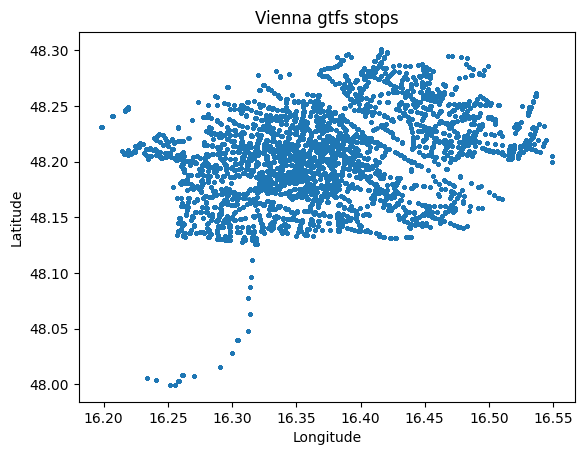

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = edges.stop_lon, y= edges.stop_lat, s = 3)
plt.title('Vienna gtfs stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.xlim(16.30, 16.35)
# plt.ylim(48.20, 48.10)
plt.show()

#### checking for a single tram line : 41

In [6]:
trips = edges.groupby('route_short_name')

In [8]:
trips41 = trips.get_group('41')

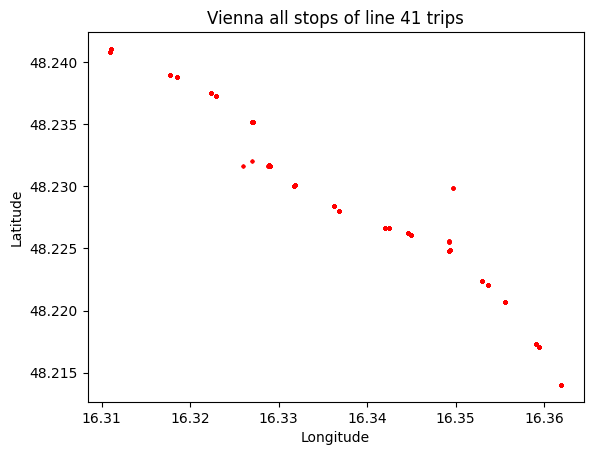

In [9]:
fig, ax = plt.subplots()
# ax.plot(trips41.stop_lon, trips41.stop_lat)
ax.scatter(x = trips41.stop_lon, y= trips41.stop_lat, s = 3, color = 'red', zorder = 3)
plt.title('Vienna all stops of line 41 trips')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.xlim(16.30, 16.35)
# plt.ylim(48.20, 48.10)
plt.show()

In [10]:
trips41_exp = trips41.drop(columns=['trip_id', 'departure_time'])
trips41_exp.to_csv("41_all_trips.csv", index=False)

In [11]:
trips41_selected = trips41[(trips41['stop_id'] == 'at:49:1056:0:5') & (trips41['target_stop_id'] == 'at:49:1202:0:4')]

In [12]:
print('checking if all are same')
for column in trips41_selected.columns:
    print(column, '   :   ', len(trips41_selected[column].unique()))

checking if all are same
stop_id    :    1
target_stop_id    :    1
trip_id    :    472
departure_time    :    332
route_short_name    :    1
duration_to_next    :    2
stop_lat    :    1
stop_lon    :    1


In [13]:
trips41_grouped = trips41.groupby(['stop_id', 'target_stop_id'])
condensed41 = pd.DataFrame([], columns = ['stop_id', 'target_stop_id', 'duration'])
len(trips41_grouped)


33

In [17]:
#try with aggregate
aggregated = trips41_grouped.agg({'duration_to_next':'mean'})
len(aggregated)

33

In [15]:
stopsome = trips41_grouped.get_group(('at:49:1056:0:5', 'at:49:1202:0:4'))
print(len(stopsome))
#funguje

472


In [16]:
#musime mergovat vsetky edges s rovnakym start end, zobrat mean duration and save all departure times in a list

#### by start stop node uniqueness

In [28]:
stops = edges.groupby(['stop_id', 'target_stop_id'])


In [29]:
len(stops)

5335

In [33]:
stops.grouper.group_info


(array([   0,    2,    3, ..., 3099, 3315, 2322]),
 array([       2,     4476,     8955, ..., 20008806, 20013952, 20014135]),
 5335)

In [110]:
for key, group in stops:
    print(f"Group: {key}")
    print(pd.unique(group['route_short_name']))
    print('---')

Group: ('at:43:3121:0:1', 'at:43:3134:0:2')
['WLB']
---
Group: ('at:43:3134:0:1', 'at:43:3121:0:1')
['WLB']
---
Group: ('at:43:3134:0:2', 'at:43:3142:0:3')
['WLB']
---
Group: ('at:43:3142:0:3', 'at:43:6055:0:1')
['WLB']
---
Group: ('at:43:3142:0:4', 'at:43:3134:0:1')
['WLB']
---
Group: ('at:43:3499:0:1', 'at:49:1159:0:2')
['25A' '25B']
---
Group: ('at:43:3499:0:4', 'at:43:3509:0:1')
['25A' '25B']
---
Group: ('at:43:3507:0:1', 'at:43:3510:0:1')
['25A' '25B']
---
Group: ('at:43:3507:0:2', 'at:43:3509:0:2')
['25A' '25B']
---
Group: ('at:43:3509:0:1', 'at:43:3507:0:1')
['25A' '25B']
---
Group: ('at:43:3509:0:2', 'at:43:3499:0:1')
['25A' '25B']
---
Group: ('at:43:3510:0:2', 'at:43:3507:0:2')
['25A' '25B']
---
Group: ('at:43:3556:0:2', 'at:43:3558:0:2')
['26A']
---
Group: ('at:43:3558:0:1', 'at:43:3556:0:2')
['26A']
---
Group: ('at:43:3558:0:2', 'at:49:441:0:2')
['26A']
---
Group: ('at:43:3615:0:3', 'at:43:4302:0:1')
['WLB']
---
Group: ('at:43:3615:0:4', 'at:43:4331:0:4')
['WLB']
---
Group: 

In [96]:
len(stops.keys)

2

In [97]:
stops_collapsed = pd.DataFrame({'stop_id':[], 'target_stop_id':[], 'duration': [], 'transit_routes': pd.Series(dtype=object)})

In [99]:
for key, group in stops:
    stops_collapsed['stop_id'] = key[0]
    stops_collapsed['target_stop_id'] = key[1]
    stops_collapsed['duration'] = group['duration_to_next'].mean()
    shortnames_list = group['route_short_name'].agg(list).reset_index(drop=True)
    # shortnames_list = group['route_short_name'].agg(pd.Series).reset_index(drop=True)

    stops_collapsed['transit_routes'] = list(shortnames_list[0])


ValueError: Length of values (2) does not match length of index (3)

In [89]:
stops_collapsed

,stop_id,target_stop_id,duration,transit_routes
0,at:49:9:0:2,at:49:1752:0:1,60.0,N
1,at:49:9:0:2,at:49:1752:0:1,60.0,2
2,at:49:9:0:2,at:49:1752:0:1,60.0,4
